In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick_ohlc
import datetime
from dateutil.parser import parse
import tushare as ts

In [2]:
gp1 = ts.get_hist_data('150131') #通过ts.get_hist_data函数得到数据
gp1[-1:]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2013-09-11,0.9,0.97,0.951,0.9,442834.22,-0.049,-4.9,0.951,0.951,0.951,442834.22,442834.22,442834.22


In [3]:
gp1.insert(0, 'date', gp1.index) #添加列date便于计算
gp1[-1:]

,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,,
2013-09-11,2013-09-11,0.9,0.97,0.951,0.9,442834.22,-0.049,-4.9,0.951,0.951,0.951,442834.22,442834.22,442834.22


In [4]:
gp2 = gp1.T[:5].T.sort() #转置后去除冗余列，再转置后排序
gp2[-1:]

/home/wangshi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,date,open,high,close,low
date,,,,,
2016-04-15,2016-04-15,0.535,0.537,0.529,0.522


In [5]:
gp3 = pd.DataFrame(gp2, columns=['date', 'open', 'high', 'low', 'close']) #通过建立新的适于candlestick_ohlc的DataFrame
gp3[-1:]

,date,open,high,low,close
date,,,,,
2016-04-15,2016-04-15,0.535,0.537,0.522,0.529


In [6]:
for i in range(0, len(gp3.index)):
    gp3.iloc[i].date = float(parse(gp3.iloc[i].date).date().toordinal()) #将date的值转化为适用于candlestick_ohlc的数字
gp3[-1:]

,date,open,high,low,close
date,,,,,
2016-04-15,736069,0.535,0.537,0.522,0.529


In [7]:
list1 = []
for i in range(0, len(gp3.index)):
    list1.append(tuple(gp3.iloc[i])) #将每行值转化为元组
list1[0]

(735122.0, 0.9, 0.97, 0.9, 0.951)

Populating the interactive namespace from numpy and matplotlib


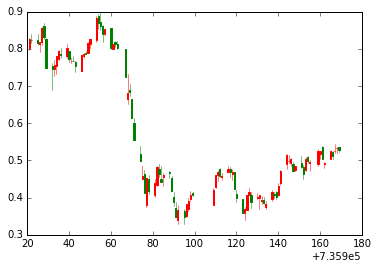

In [11]:
%pylab inline
fig= plt.figure()
ax = fig.add_subplot(1,1,1)
candlestick_ohlc(ax, list1[-100:], width=0.6, colorup='r', colordown='g')
show()